In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap

In [2]:
graph = {}
nodes = set()
edges = []
with open('linky.txt','r',) as file:
    for line in file:
        stanice = line.split(':  ')[1].strip('\n').split(';')
        linka =  line.split(':  ')[0]
        #print(linka)
        for i,stanica in enumerate(stanice[:-1]):
            nodes.add(stanica)
            edges.append((stanice[i-1],stanica))
            if i != 0:
                try:
                    graph[stanice[i-1]][stanica] += 1
                except KeyError:
                    try:
                        graph[stanice[i-1]][stanica] = 1
                    except KeyError:
                        graph[stanice[i-1]] = {}
                        graph[stanice[i-1]][stanica] = 1

In [3]:
G = nx.DiGraph()
for node in graph:
    for neigbour in graph[node]:
        G.add_edges_from([(node,neigbour)], weight = graph[node][neigbour])

In [4]:
num_neighbors = {}
undirected_G = G.to_undirected()

# Calculate number of successors for each node
for node in undirected_G.nodes():
    neighbors = len(list(undirected_G.neighbors(node)))
    num_neighbors[node] = neighbors

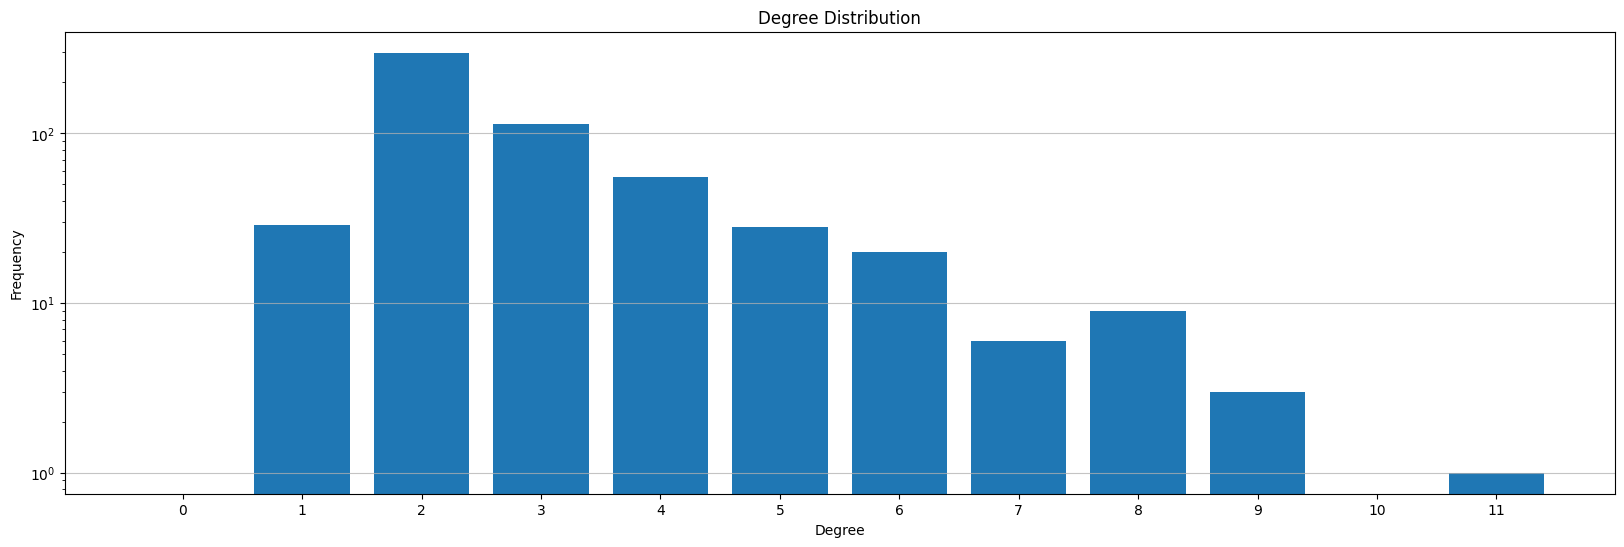

In [5]:
# Get the degree of each node
degree_sequence = [num_neighbors[n] for n in num_neighbors]

# Plot the degree distribution
plt.figure(figsize=(20, 6))

plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), align='left', rwidth=0.8)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.xticks(range(max(degree_sequence) + 1))
plt.yscale("log")

plt.grid(axis='y', alpha=0.75)
plt.show()